In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.9 sec. Average model step in 0.0327 ms.


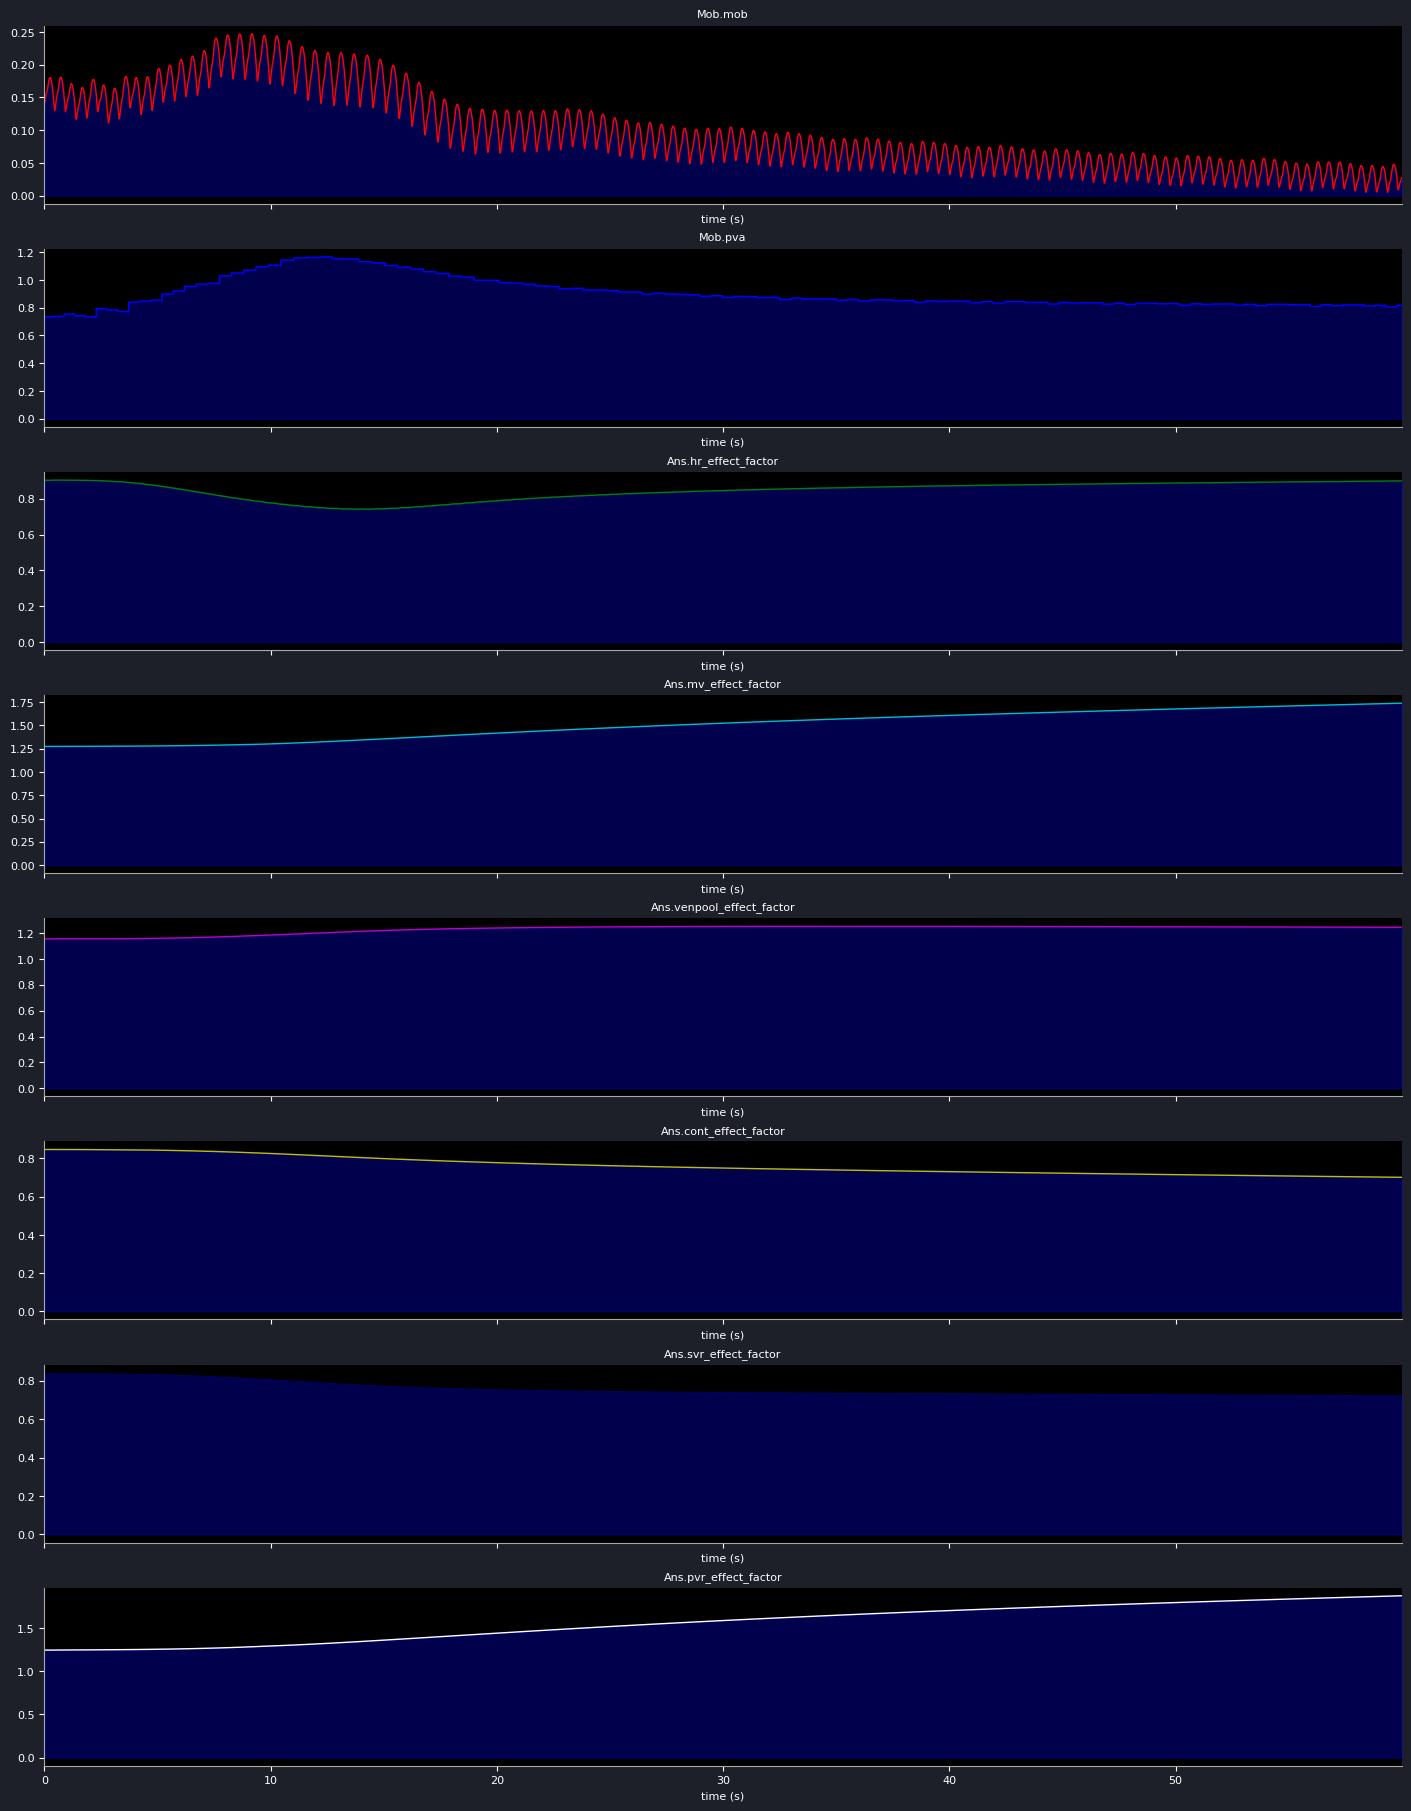


Mob.mob         : max    0.24714 min    0.00507
Mob.pva         : max    1.16583 min    0.73444
Ans.hr_effect_factor: max     0.9043 min    0.74125
Ans.mv_effect_factor: max    1.73856 min     1.2742
Ans.venpool_effect_factor: max    1.25245 min    1.15549
Ans.cont_effect_factor: max    0.84691 min    0.70124
Ans.svr_effect_factor: max    0.84124 min    0.72738
Ans.pvr_effect_factor: max    1.87465 min    1.24525


In [9]:
models["Fluids"].add_volume(vol=75, in_time=10)
#models["Fluids"].remove_volume(vol=75, in_time=10)
neo.plot_time_graph(["Mob.mob","Mob.pva", "Ans.hr_effect_factor", "Ans.mv_effect_factor", "Ans.venpool_effect_factor", "Ans.cont_effect_factor", "Ans.svr_effect_factor", "Ans.pvr_effect_factor"], combined=False, sharey=False, time_to_calculate=60, analyze=True, fill=True)

In [5]:
neo.fastforward(120)
neo.get_vitals()

 Ready in 6.2 sec. Average model step in 0.0259 ms.

AA.pres_in      : max   84.32049, min   51.50145 mmHg
PA.pres_in      : max   53.39933, min   28.02917 mmHg
IVCI.pres_in    : max   10.80823, min    6.34235 mmHg


{'heartrate': 124.09433377643846,
 'spo2_pre': 97.03185889831256,
 'spo2_post': 96.77509477508924,
 'abp_systole': 84.32049,
 'abp_diastole': 51.50145,
 'pap_systole': 53.39933,
 'pap_diastole': 28.02917,
 'cvp': 7.830827804,
 'resp_rate': 44.10221122315993,
 'pH': 7.346243414860431,
 'po2': 91.07511749308841,
 'pco2': 48.38487078039311,
 'hco3': 26.161749112849805,
 'be': -0.27849897158305814}

In [11]:
neo.analyze_heart()


LA_LV.flow      : net  236.74596, forward  236.74596, backward        0.0 ml/kg/min, stroke volume:    1.70319 ml/kg, 
RA_RV.flow      : net   236.6803, forward   236.6803, backward        0.0 ml/kg/min, stroke volume:    1.70272 ml/kg, 
RV_PA.flow      : net  235.71416, forward  235.71416, backward        0.0 ml/kg/min, stroke volume:    1.69577 ml/kg, 
LV_AA.flow      : net  235.86783, forward  235.86783, backward        0.0 ml/kg/min, stroke volume:    1.69688 ml/kg, 
IVCI_RA.flow    : net   130.3784, forward  137.10013, backward   -6.72173 ml/kg/min, stroke volume:    0.93797 ml/kg, 
SVC_RA.flow     : net  103.26936, forward  110.14204, backward   -6.87268 ml/kg/min, stroke volume:    0.74294 ml/kg, 
LA.pres_in      : max   10.56011, min    3.15155 mmHg
RA.pres_in      : max   10.56185, min    2.71012 mmHg
LV.pres_in      : max    75.7893, min    2.45403 mmHg
RV.pres_in      : max    44.1838, min    1.42458 mmHg
AA.pres_in      : max   75.46266, min   49.23759 mmHg
IVCI.pres_in   